## hierarcy clustering of vacuolar proteome

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
file_path = '/uoa/home/r04km21/sharedscratch/figure-practice/vac_ms/data_vac.csv'

In [101]:
df = pd.read_csv(file_path)
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,A0A0B7P3V8;P0C2J7;Q6Q5P6;P47024,A0A0B7P3V8;P0C2J7;Q6Q5P6;P47024,2;2;1;1,2;2;1;1,2;2;1;1,Transposon Ty4-H Gag-Pol polyprotein;Capsid pr...,YPL060C-A;TY4B-H;TY4A-H;TY4B-J,sp|A0A0B7P3V8|YP41B_YEAST Transposon Ty4-P Gag...,4,2,...,0,10545;13140,True;True,11499;14314,143279;143280;175439;175440,243420;243421;294134,243420;294134,0,80,559292;559292;559292;559292
1,A5Z2X5,A5Z2X5,1,1,1,UPF0495 protein YPR010C-A,YPR010C-A,sp|A5Z2X5|YP010_YEAST UPF0495 protein YPR010C-...,1,1,...,1,13064,True,14233,174499;174500;174501;174502;174503;174504;1745...,292740;292741;292742;292743;292744;292745;2927...,292743,NaN,NaN,559292
2,D6VTK4,D6VTK4,2,2,2,Pheromone alpha factor receptor,STE2,sp|D6VTK4|STE2_YEAST Pheromone alpha factor re...,1,2,...,32,4082;15305,True;True,4480;16877,54034;54035;206169,89757;89758;344867,89758;344867,NaN,NaN,559292
3,D6W196,D6W196,2,2,2,Truncated non-functional calcium-binding mitoc...,SAL1,sp|D6W196|CMC1_YEAST Truncated non-functional ...,1,2,...,33,3154;14033,True;True,3470;15388,42301;187814;187815,70393;313055;313056,70393;313055,37;38,56;61,559292
4,O13297,O13297,2,2,2,mRNA-capping enzyme subunit beta,CET1,sp|O13297|CET1_YEAST mRNA-capping enzyme subun...,1,2,...,34,8503;8688,True;True,9286;9486,114296;114297;114298;114299;114300;114301;1169...,195815;195816;200044;200045;200046;200047,195815;200046,NaN,NaN,559292


In [104]:
# extract the normalized ms data with gene names as index
df_normalized = df[df.columns[141:164]]
df_normalized.set_index(df["Gene names"], inplace=True)
df_normalized.columns = df_normalized.columns.str.replace("Ratio H/L normalized", "", regex=False)
# drop rows with more than 6 NaN values
df_normalized = df_normalized.dropna(thresh=6, axis=0)
df_normalized

,apl5_1,apl5_2,apl5_3,apl5_4,atg19_1,atg19_2,atg19_3,atg19_4,gga_1,gga_2,...,vps10_2,vps10_3,vps10_4,vps45_1,vps45_2,vps45_3,vps45_4,WT_1,WT_2,WT_3
Gene names,,,,,,,,,,,,,,,,,,,,,
RPS9A,NaN,NaN,0.95787,1.04700,NaN,0.81393,NaN,1.15620,0.61034,0.70381,...,NaN,NaN,1.03630,NaN,NaN,NaN,NaN,0.93025,NaN,0.96180
RPL36B,0.68913,0.72197,1.00070,0.99326,0.94295,0.92374,0.91514,0.98637,0.83492,0.77834,...,0.93131,NaN,0.83806,0.72658,0.83944,NaN,0.73713,0.98853,0.99388,1.00110
MBF1,NaN,NaN,0.95029,0.90694,1.06370,1.01730,0.98246,1.63810,0.58295,0.72478,...,NaN,0.92466,0.85675,NaN,1.38650,NaN,1.08530,1.15300,1.04610,NaN
CYC1,NaN,NaN,0.88012,3.24800,0.49031,NaN,NaN,2.19800,1.58830,1.43990,...,NaN,NaN,1.26350,NaN,NaN,NaN,NaN,NaN,0.96052,NaN
QCR7,1.17300,NaN,1.44900,2.71590,NaN,1.04640,1.21480,2.54380,2.69350,2.01060,...,NaN,1.32100,1.21010,NaN,NaN,NaN,NaN,NaN,1.01200,0.94011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEY1,0.95217,0.95080,0.94249,2.01150,1.06100,1.08110,1.13860,1.66860,1.50680,1.31620,...,1.00430,1.06810,1.17450,1.32500,1.11380,NaN,1.90560,0.99989,1.03460,1.03850
ODC2,1.03460,1.14920,1.05520,2.94920,NaN,NaN,NaN,2.07540,1.99650,1.56430,...,0.91199,1.20160,1.13380,NaN,NaN,NaN,NaN,NaN,0.96626,0.90491
MPD2,0.99692,1.17850,0.91803,2.21580,1.17190,1.15140,1.13450,2.16670,1.62980,1.12370,...,0.85686,NaN,1.11270,2.01750,1.43670,1.87820,2.16120,1.04010,0.97880,1.01810


In [105]:
# mask dataframe for sns.clustermap
df_mask = df_normalized.isna()
df_mask

,apl5_1,apl5_2,apl5_3,apl5_4,atg19_1,atg19_2,atg19_3,atg19_4,gga_1,gga_2,...,vps10_2,vps10_3,vps10_4,vps45_1,vps45_2,vps45_3,vps45_4,WT_1,WT_2,WT_3
Gene names,,,,,,,,,,,,,,,,,,,,,
RPS9A,True,True,False,False,True,False,True,False,False,False,...,True,True,False,True,True,True,True,False,True,False
RPL36B,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
MBF1,True,True,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,True
CYC1,True,True,False,False,False,True,True,False,False,False,...,True,True,False,True,True,True,True,True,False,True
QCR7,False,True,False,False,True,False,False,False,False,False,...,True,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEY1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
ODC2,False,False,False,False,True,True,True,False,False,False,...,False,False,False,True,True,True,True,True,False,False
MPD2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## hierarchical clustering with standardization

In [106]:
# standardize the data
scaler = StandardScaler()
df_normalized_standalized = pd.DataFrame(scaler.fit_transform(df_normalized), index=df_normalized.index, columns=df_normalized.columns)
df_normalized_standalized

,apl5_1,apl5_2,apl5_3,apl5_4,atg19_1,atg19_2,atg19_3,atg19_4,gga_1,gga_2,...,vps10_2,vps10_3,vps10_4,vps45_1,vps45_2,vps45_3,vps45_4,WT_1,WT_2,WT_3
Gene names,,,,,,,,,,,,,,,,,,,,,
RPS9A,NaN,NaN,-0.170303,-0.552534,NaN,-0.975030,NaN,-0.438428,-0.814376,-0.792143,...,NaN,NaN,-0.203114,NaN,NaN,NaN,NaN,-0.438766,NaN,-0.283096
RPL36B,-0.765901,-0.782057,0.002421,-0.608803,-0.277638,-0.356655,-0.657921,-0.623957,-0.520816,-0.665927,...,-0.447946,NaN,-0.723920,-0.576284,-0.358775,NaN,-0.704144,-0.048240,-0.002263,0.011947
MBF1,NaN,NaN,-0.200871,-0.699186,0.235560,0.170211,-0.197972,0.088017,-0.850178,-0.756631,...,NaN,-0.545486,-0.674818,NaN,0.373575,NaN,-0.267033,1.053851,0.127062,NaN
CYC1,NaN,NaN,-0.483851,1.752059,-2.201398,NaN,NaN,0.699672,0.463964,0.454421,...,NaN,NaN,0.393774,NaN,NaN,NaN,NaN,NaN,-0.084881,NaN
QCR7,0.851917,NaN,1.810315,1.194915,NaN,0.334082,1.389437,1.077437,1.908626,1.420898,...,NaN,0.488876,0.253484,NaN,NaN,NaN,NaN,NaN,0.042612,-0.445933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEY1,0.113573,0.066799,-0.232327,0.457361,0.224085,0.529489,0.868818,0.121336,0.357432,0.244936,...,-0.279867,-0.171139,0.159958,0.103428,0.008511,NaN,0.762812,0.027882,0.098582,0.292727
ODC2,0.389177,0.802773,0.222208,1.439195,NaN,NaN,NaN,0.565740,0.997543,0.665092,...,-0.492436,0.177267,0.053033,NaN,NaN,NaN,NaN,NaN,-0.070665,-0.710196
MPD2,0.263194,0.911462,-0.330969,0.671277,0.695420,0.925371,0.840806,0.665479,0.518211,-0.081062,...,-0.619388,NaN,-0.002400,0.890000,0.440778,1.072561,1.083705,0.297324,-0.039609,0.139574


In [107]:
# split the dataframe to each strain and fill NaN
# used the mean of each row to fill NaN if there is at least one value in the row
# used the mean of the column to fill NaN if there is no value in the row 
columns_cycle = len(df_normalized_standalized.columns) // 4 + 1
dataframes = []
for i in range(columns_cycle):
    subset = df_normalized_standalized[df_normalized_standalized.columns[i*4:(i+1)*4]]
    # print(subset.head())
    subset = subset.apply(lambda row: row.fillna(row.mean()), axis=1)
    subset.fillna(subset.mean(), inplace=True)
    dataframes.append(subset)
# concatenate the dataframes
concatenated_df = pd.concat(dataframes, axis=1)
concatenated_df

,apl5_1,apl5_2,apl5_3,apl5_4,atg19_1,atg19_2,atg19_3,atg19_4,gga_1,gga_2,...,vps10_2,vps10_3,vps10_4,vps45_1,vps45_2,vps45_3,vps45_4,WT_1,WT_2,WT_3
Gene names,,,,,,,,,,,,,,,,,,,,,
RPS9A,-0.361418,-0.361418,-0.170303,-0.552534,-0.706729,-0.975030,-0.706729,-0.438428,-0.814376,-0.792143,...,-0.203114,-0.203114,-0.203114,-0.013486,-0.025562,-0.013504,0.015722,-0.438766,-0.360931,-0.283096
RPL36B,-0.765901,-0.782057,0.002421,-0.608803,-0.277638,-0.356655,-0.657921,-0.623957,-0.520816,-0.665927,...,-0.447946,-0.585933,-0.723920,-0.576284,-0.358775,-0.546401,-0.704144,-0.048240,-0.002263,0.011947
MBF1,-0.450029,-0.450029,-0.200871,-0.699186,0.235560,0.170211,-0.197972,0.088017,-0.850178,-0.756631,...,-0.610152,-0.545486,-0.674818,0.053271,0.373575,0.053271,-0.267033,1.053851,0.127062,0.590457
CYC1,0.634104,0.634104,-0.483851,1.752059,-2.201398,-0.750863,-0.750863,0.699672,0.463964,0.454421,...,0.393774,0.393774,0.393774,-0.013486,-0.025562,-0.013504,0.015722,-0.084881,-0.084881,-0.084881
QCR7,0.851917,1.285716,1.810315,1.194915,0.933652,0.334082,1.389437,1.077437,1.908626,1.420898,...,0.371180,0.488876,0.253484,-0.013486,-0.025562,-0.013504,0.015722,-0.201661,0.042612,-0.445933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEY1,0.113573,0.066799,-0.232327,0.457361,0.224085,0.529489,0.868818,0.121336,0.357432,0.244936,...,-0.279867,-0.171139,0.159958,0.103428,0.008511,0.291584,0.762812,0.027882,0.098582,0.292727
ODC2,0.389177,0.802773,0.222208,1.439195,0.565740,0.565740,0.565740,0.565740,0.997543,0.665092,...,-0.492436,0.177267,0.053033,-0.013486,-0.025562,-0.013504,0.015722,-0.390431,-0.070665,-0.710196
MPD2,0.263194,0.911462,-0.330969,0.671277,0.695420,0.925371,0.840806,0.665479,0.518211,-0.081062,...,-0.619388,-0.310894,-0.002400,0.890000,0.440778,1.072561,1.083705,0.297324,-0.039609,0.139574


/uoa/home/r04km21/miniconda3/envs/my_env/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/uoa/home/r04km21/miniconda3/envs/my_env/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


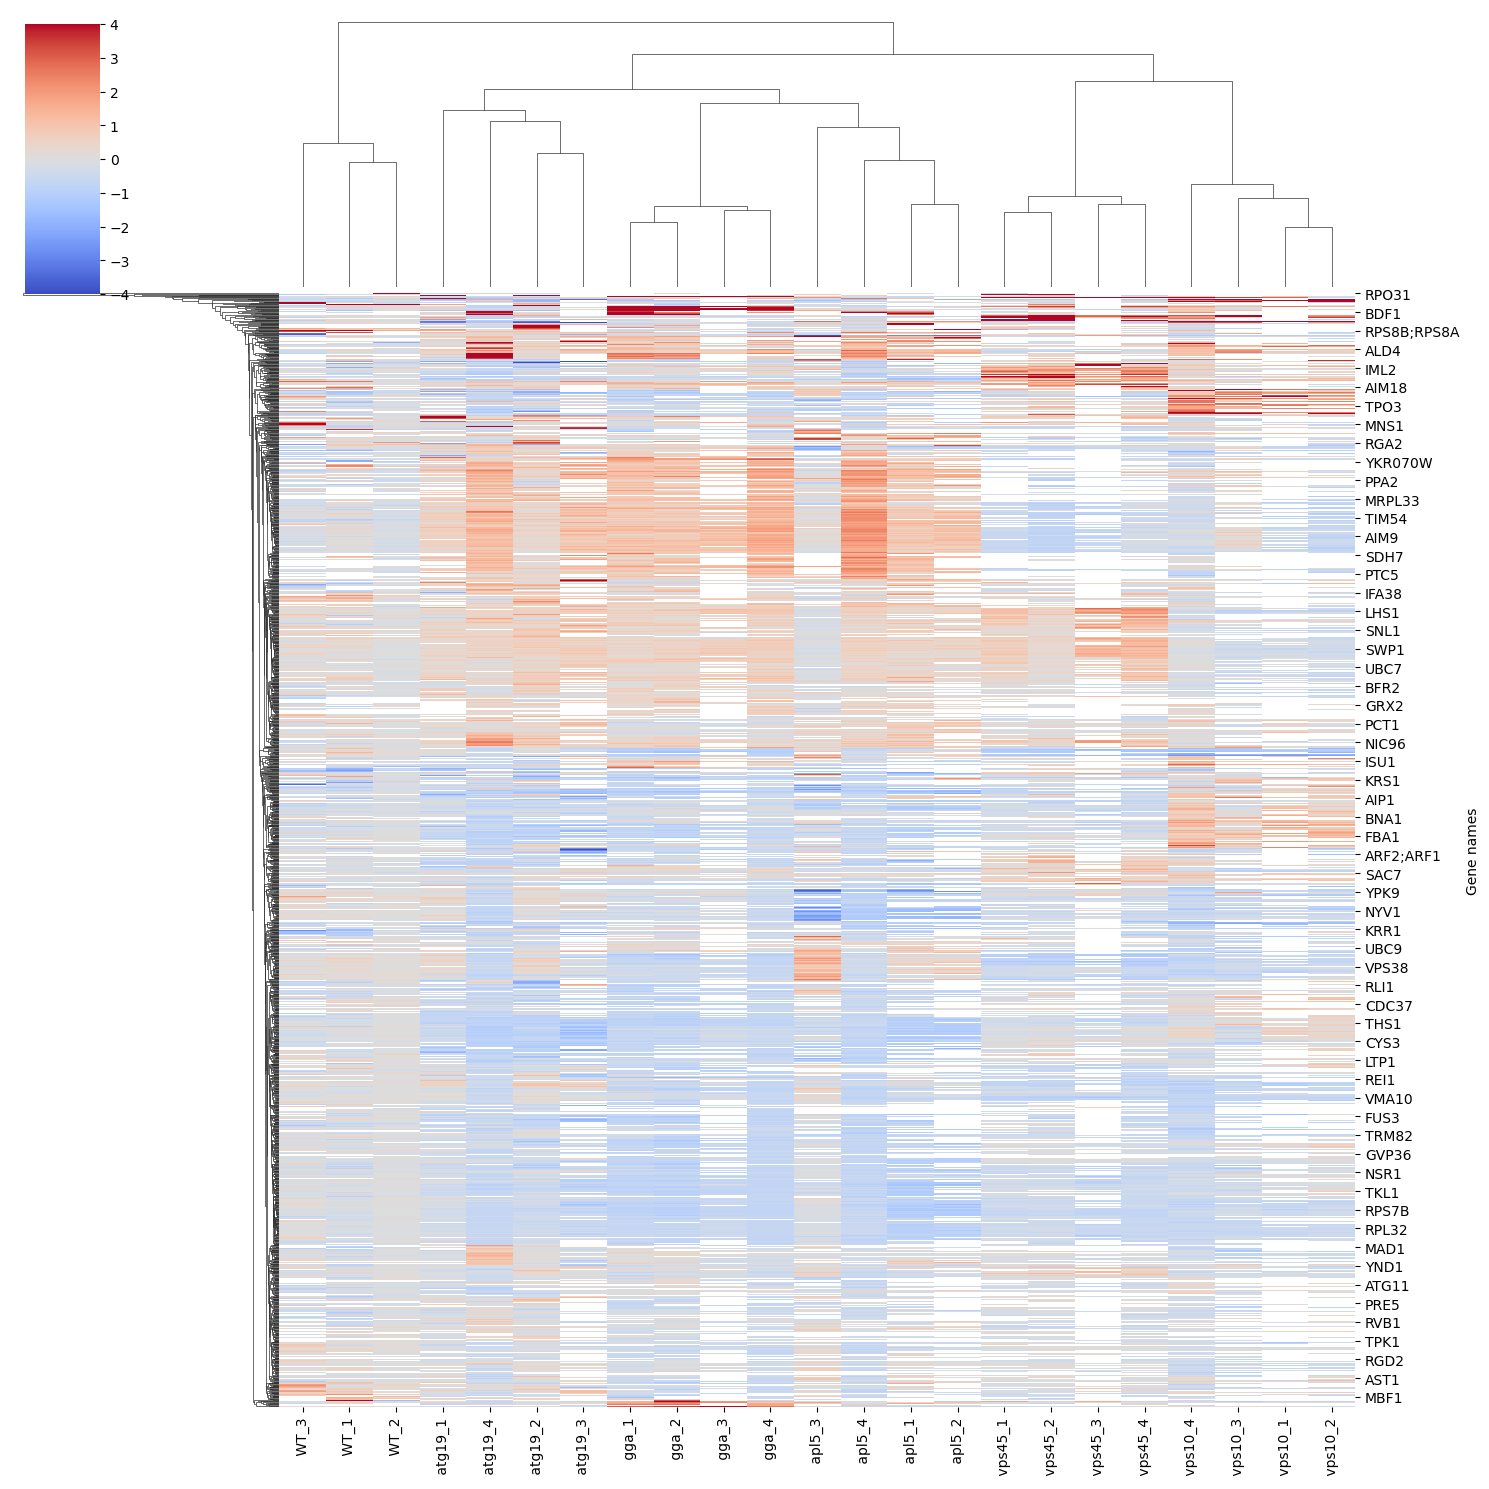

In [108]:
# visualize the hierarchical clustering with sns.clustermap
clustergrid = sns.clustermap(concatenated_df, figsize=(15, 15), mask=df_mask, cmap='coolwarm', method='average', metric='euclidean', vmin=-4, vmax=4) 

## visualize the hierarchical clustering around ATG22

In [109]:
Z = linkage(concatenated_df, 'ward')
Z

array([[2.21000000e+02, 1.87700000e+03, 3.15474114e-01, 2.00000000e+00],
       [1.47000000e+02, 1.29900000e+03, 3.36950719e-01, 2.00000000e+00],
       [6.00000000e+01, 1.79000000e+02, 3.56453021e-01, 2.00000000e+00],
       ...,
       [3.80500000e+03, 3.80600000e+03, 6.71500676e+01, 7.73000000e+02],
       [4.60000000e+01, 3.80800000e+03, 8.93508936e+01, 7.74000000e+02],
       [3.80700000e+03, 3.80900000e+03, 1.18771929e+02, 1.90600000e+03]],
      shape=(1905, 4))

(0.0, 905.0)

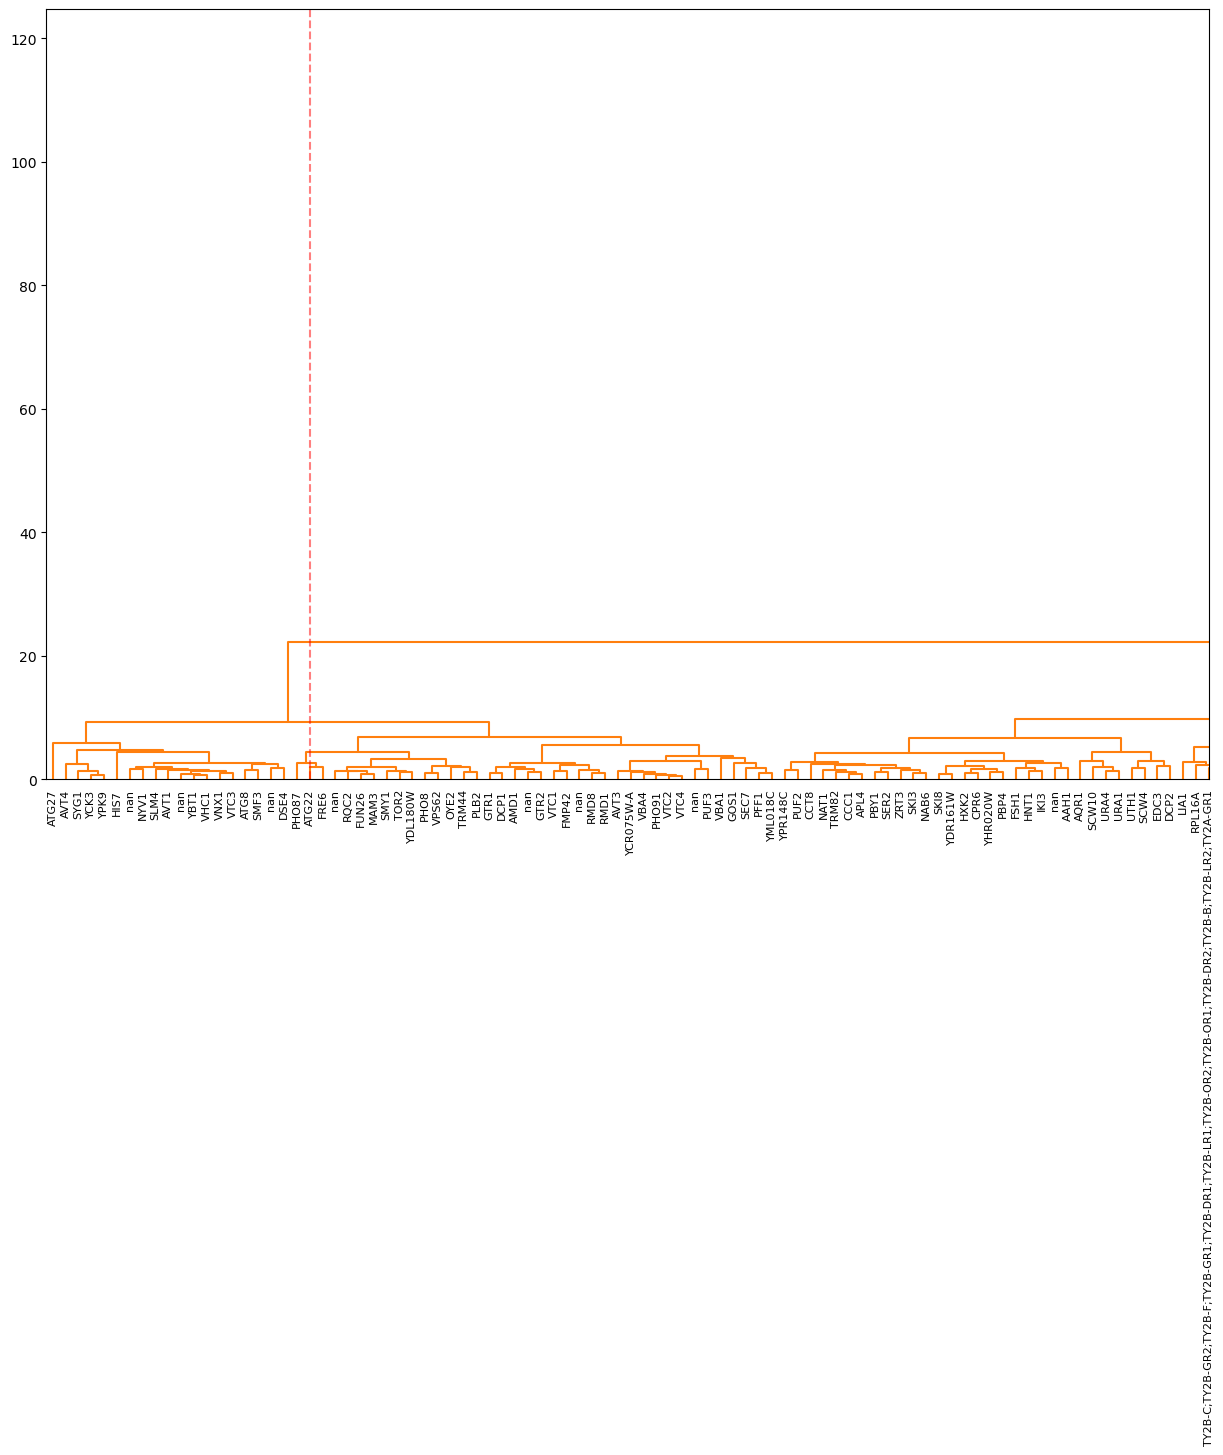

In [110]:
plt.figure(figsize=(15, 10))

# デンドログラムを作成し、leaf_labelsを保存
d = dendrogram(Z, 
               leaf_font_size=8,
               leaf_rotation=90,
               labels=concatenated_df.index)

# PIB2の位置を特定
leaf_labels = d['ivl']  # leaf_labelsを取得
atg22_idx = leaf_labels.index('ATG22')  # PIB2のインデックスを取得

# PIB2の位置に赤い縦線を引く
x = 5+10*atg22_idx
plt.axvline(x=x, color='red', linestyle='--', alpha=0.5)

plt.xlim(0, x+700)

## visualize the hierarchical clustering around ATG22 without standardization (raw data)

In [111]:
# fill NaN with mean of the strain
df_normalized.fillna(df_normalized.mean(), inplace=True)
df_normalized

,apl5_1,apl5_2,apl5_3,apl5_4,atg19_1,atg19_2,atg19_3,atg19_4,gga_1,gga_2,...,vps10_2,vps10_3,vps10_4,vps45_1,vps45_2,vps45_3,vps45_4,WT_1,WT_2,WT_3
Gene names,,,,,,,,,,,,,,,,,,,,,
RPS9A,0.918202,0.932793,0.95787,1.047000,1.008275,0.813930,1.011436,1.156200,0.61034,0.703810,...,1.125834,1.133676,1.03630,1.233942,1.107442,1.204616,1.297999,0.930250,0.994794,0.961800
RPL36B,0.689130,0.721970,1.00070,0.993260,0.942950,0.923740,0.915140,0.986370,0.83492,0.778340,...,0.931310,1.133676,0.83806,0.726580,0.839440,1.204616,0.737130,0.988530,0.993880,1.001100
MBF1,0.918202,0.932793,0.95029,0.906940,1.063700,1.017300,0.982460,1.638100,0.58295,0.724780,...,1.125834,0.924660,0.85675,1.233942,1.386500,1.204616,1.085300,1.153000,1.046100,0.999509
CYC1,0.918202,0.932793,0.88012,3.248000,0.490310,0.987074,1.011436,2.198000,1.58830,1.439900,...,1.125834,1.133676,1.26350,1.233942,1.107442,1.204616,1.297999,0.995729,0.960520,0.999509
QCR7,1.173000,0.932793,1.44900,2.715900,1.008275,1.046400,1.214800,2.543800,2.69350,2.010600,...,1.125834,1.321000,1.21010,1.233942,1.107442,1.204616,1.297999,0.995729,1.012000,0.940110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEY1,0.952170,0.950800,0.94249,2.011500,1.061000,1.081100,1.138600,1.668600,1.50680,1.316200,...,1.004300,1.068100,1.17450,1.325000,1.113800,1.204616,1.905600,0.999890,1.034600,1.038500
ODC2,1.034600,1.149200,1.05520,2.949200,1.008275,0.987074,1.011436,2.075400,1.99650,1.564300,...,0.911990,1.201600,1.13380,1.233942,1.107442,1.204616,1.297999,0.995729,0.966260,0.904910
MPD2,0.996920,1.178500,0.91803,2.215800,1.171900,1.151400,1.134500,2.166700,1.62980,1.123700,...,0.856860,1.133676,1.11270,2.017500,1.436700,1.878200,2.161200,1.040100,0.978800,1.018100


In [112]:
Z_2 = linkage(df_normalized, 'ward')
Z_2

array([[1.46000000e+03, 1.71400000e+03, 1.34617380e-01, 2.00000000e+00],
       [4.52000000e+02, 8.63000000e+02, 1.49453250e-01, 2.00000000e+00],
       [1.47000000e+02, 1.29900000e+03, 1.49491980e-01, 2.00000000e+00],
       ...,
       [3.80500000e+03, 3.80700000e+03, 4.60318449e+01, 6.45000000e+02],
       [3.80300000e+03, 3.80800000e+03, 5.14715015e+01, 6.57000000e+02],
       [3.80400000e+03, 3.80900000e+03, 8.67858184e+01, 1.90600000e+03]],
      shape=(1905, 4))

(2955.0, 3505.0)

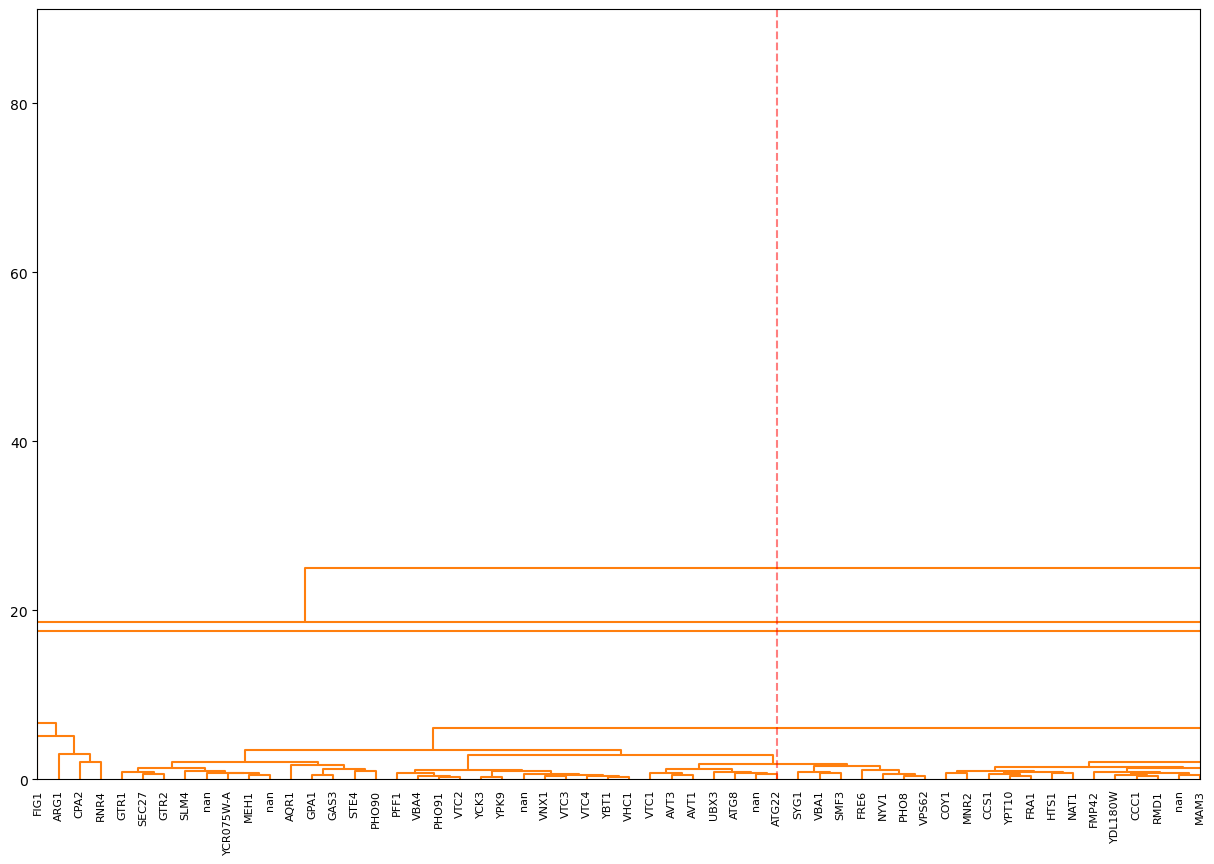

In [113]:
plt.figure(figsize=(15, 10))

# デンドログラムを作成し、leaf_labelsを保存
d = dendrogram(Z_2, 
               leaf_font_size=8,
               leaf_rotation=90,
               labels=df_normalized.index)

# PIB2の位置を特定
leaf_labels = d['ivl']  # leaf_labelsを取得
atg22_idx = leaf_labels.index('ATG22')  

# ATG22の位置に赤い縦線を引く
x = 5+10*atg22_idx
plt.axvline(x=x, color='red', linestyle='--', alpha=0.5)

plt.xlim(x-350, x+200)